# Generating Synthetic Datasets for Dimension Reduction

In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

from src.data import synthetic as synthset
from src.visualization import plotting as viz

In [2]:
sns.set_context("poster")
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
random_state = 6502
n_points = 1000
noise = 0.05

## S-Curve

In [5]:
s_curve_data, s_curve_color = datasets.samples_generator.make_s_curve(n_points,
                                                                      random_state=random_state)

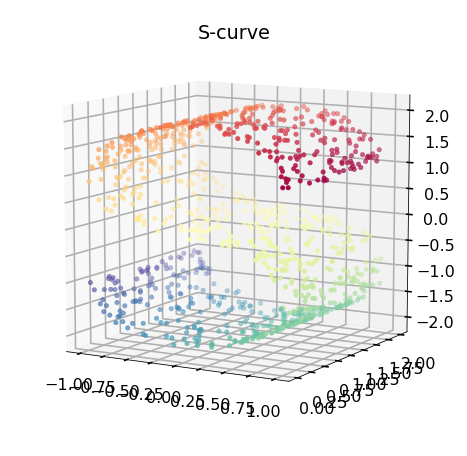

In [6]:
viz.plot_3d_dataset(s_curve_data, s_curve_color, title='S-curve')

## Swiss Roll

In [7]:
swiss_roll_data, swiss_roll_color = datasets.samples_generator.make_swiss_roll(n_points,
                                                                               noise=0.2, random_state=random_state)

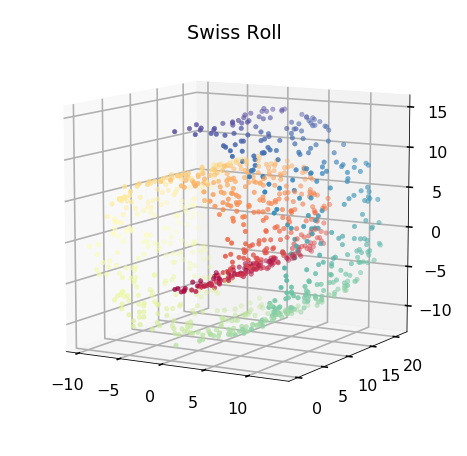

In [8]:
viz.plot_3d_dataset(swiss_roll_data, swiss_roll_color, title='Swiss Roll')

## Gaussian Blobs

In [9]:
n_dim = 10
n_blobs = 4

In [10]:
blob_data, blob_labels = datasets.samples_generator.make_blobs(n_points,
                                                              centers=n_blobs, n_features=n_dim,
                                                              random_state=random_state)

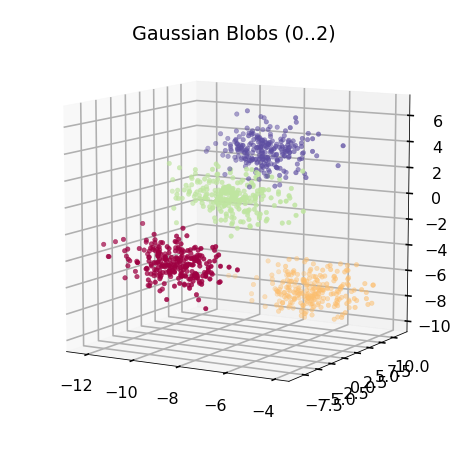

In [11]:
viz.plot_3d_dataset(blob_data, blob_labels, title='Gaussian Blobs (0..2)')

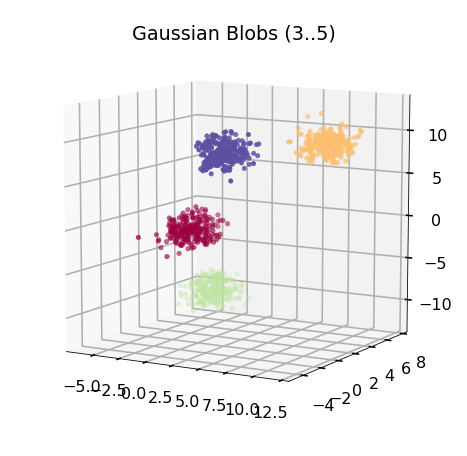

In [12]:
viz.plot_3d_dataset(blob_data, blob_labels, title='Gaussian Blobs (3..5)', dim_list=[3, 4, 5])

## Surface of a Sphere

In [13]:
sphere_data, sphere_color = synthset.sample_sphere_surface(n_points, random_state=random_state)

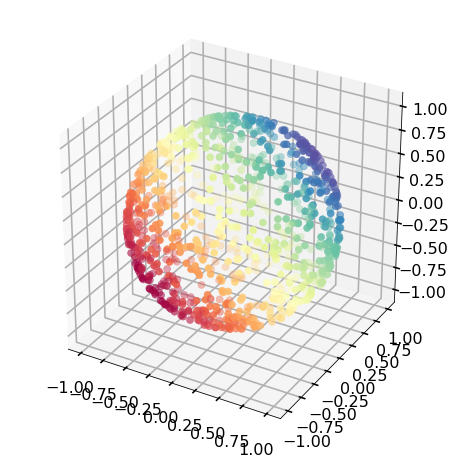

In [14]:
viz.sphere_plot(sphere_data, sphere_color, wireframe=False)

 ## Sample inside a unit ball

In [15]:
ball_data, ball_color = synthset.sample_ball(n_points, random_state=random_state)

In [16]:
sphere_color.shape

(1000,)

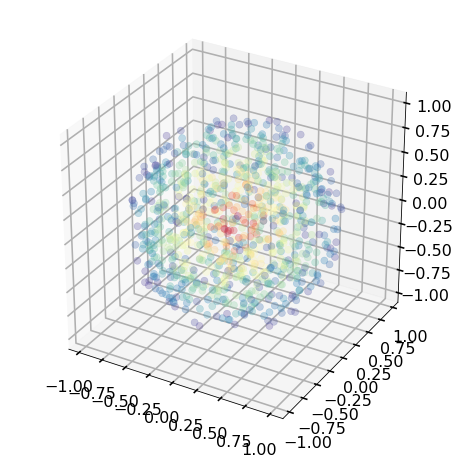

In [17]:
viz.sphere_plot(ball_data, ball_color, alpha=0.3)

## Helix

In [18]:
data, colors = synthset.helix(random_state=random_state, noise=0.05)

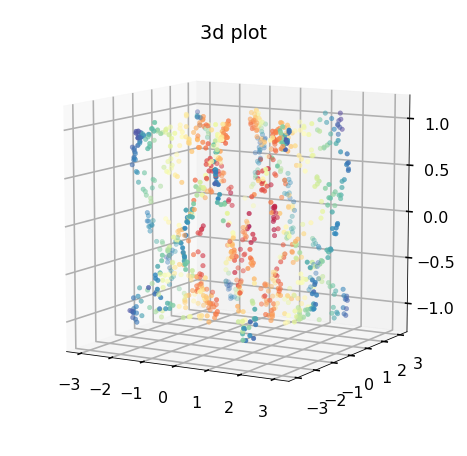

In [19]:
viz.plot_3d_dataset(data, colors)

## Broken Swiss Roll

In [20]:
kind='broken_swiss_roll'
X, t = synthset.synthetic_data(kind=kind, random_state=random_state, noise=noise, n_points=1000)

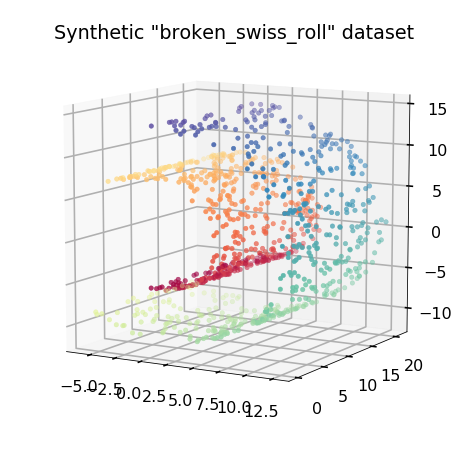

In [21]:
viz.plot_3d_dataset(X, t, title=f'Synthetic "{kind}" dataset',)

## 5-dimensional "Difficult"

In [22]:
noise=0.02
kind='difficult'
X, t = synthset.synthetic_data(kind=kind, random_state=random_state, noise=noise, n_points=10000)

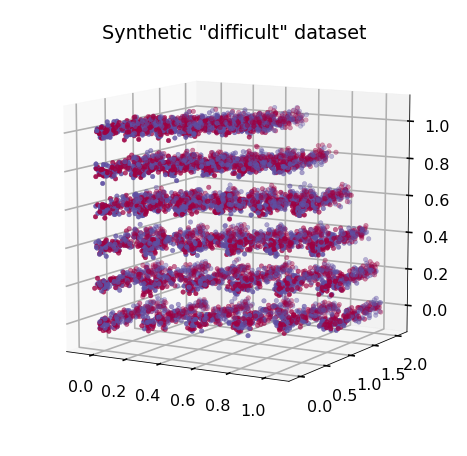

In [23]:
viz.plot_3d_dataset(X, t, title=f'Synthetic "{kind}" dataset', dim_list=[5,6,7])